In [7]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gamma = 0.95                            # discount factor
alpha = 1                               # learning rate
epsilon = 1                             # for exploration
epsilon_decay = 0.9995                  # multiply
best_reward = -np.inf                   # store the best reward
episode_count = 10000                   # total number of episodes
rewards = []                            # store rewards over episodes
best_rewards = []                       # store best rewards over episodes
q_table = {}                            # q table as dictionary
state_space_length = (5, 4, 4, 4)       # (pole angle, cart position, pole velocity, cart velocity), dimensions of q table

In [9]:
env = gym.make("CartPole-v1")           # initialize the gym

                                        # initialize the q table
for angle in range(state_space_length[0]):                                 # pole angle
    for pole_v in range(state_space_length[1]):                            # pole velocity
        for cart_pos in range(state_space_length[2]):                      # cart position
            for cart_vel in range(state_space_length[3]):                  # cart velocity
                for action in range(2):                                    # action (left or right)
                    q_table[(angle, pole_v, cart_pos, cart_vel), action] = 0

In [10]:
# discrete the observation values given by the environment
def observation_coverter(obsv):
    x = np.degrees(obsv[2]) % 360 # degrees are between -15 and 15, radian is converted to degrees
    
    if x >= 344 and x <= 353.5:
        angle = 0
    elif x > 353.5 and x < 360:
        angle = 1
    elif x >= 0 and x < 7.5:
        angle = 2
    elif x >= 7.5 and x <= 16:
        angle = 3
    else:
        angle = 4
        
    y = obsv[0] # cart positions are between -2.4 and 2.4
    
    if y <= -1.2:
        pos = 0
    elif y > -1.2 and y < 0:
        pos = 1
    elif y >= 0 and y < 1.2:
        pos = 2
    elif y >= 1.2:
        pos = 3
        
    z = obsv[1]
    
    if z < -1.5:
        cvel = 0
    elif z >= -1.5 and z < 0:
        cvel = 1
    elif z >= 0 and z <= 1.5:
        cvel = 2
    elif z > 1.5:
        cvel = 3
        
    t = obsv[3]
    
    if t < -1.5:
        pvel = 0
    elif t >= -1.5 and t < 0:
        pvel = 1
    elif t >= 0 and t <= 1.5:
        pvel = 2
    elif t > 1.5:
        pvel = 3
        
    return (angle, pos, cvel, pvel)

In [11]:
# return maximum Q value and the corresponding action that can be achieved from a state
def max_reward_state(obsv):
    left = q_table[obsv, 0] # maximum Q value by going left
    right = q_table[obsv, 1] # maximum Q value by going right
    
    return (0, left) if left > right else (1, right)

In [12]:
for episode in range(episode_count): # try for x episodes
    observation = env.reset() # reset the environment
    episodic_reward = 0 # keep track of the episodic reward
    observation = observation_coverter(observation) # discretize the initial observation
    done = False # not done at the start of an episode

    while not done:
        if np.random.rand() < epsilon: # exploration
            action = env.action_space.sample()
        else: # exploitation
            action = max_reward_state(observation)[0]
        
        next_observation, reward, done, info = env.step(action) # get the environment info from the result of the action
        episodic_reward += reward # update the episodic reward
        
        if done: # if not done, update the q table
            reward = -1    
            
        next_observation = observation_coverter(next_observation) # discretize the next observation

        next_q = max_reward_state(next_observation)[1] # get maximum Q value of the possible actions
        current_q = q_table[observation, action] # get current state's Q value

        temporal_difference = reward + (gamma * next_q) - current_q # calculate the temporal difference
        q_table[observation, action] += alpha * temporal_difference # update the current state's Q value

        observation = next_observation # set the next observation as current one
    
    epsilon = epsilon * epsilon_decay # update the epsilon
    alpha = max(0, alpha - 0.0002) # update the learning rate
        
    if episodic_reward > best_reward: # check if best reward has been exceeded in this episode
        best_reward = episodic_reward
    
    rewards.append(episodic_reward)  # store reward and best reward for later visualization
    best_rewards.append(best_reward)

    print("Episode: ", episode, " Best Reward: ", best_reward, " Episodic Reward: ", episodic_reward)

Episode:  0  Best Reward:  24.0  Episodic Reward:  24.0
Episode:  1  Best Reward:  24.0  Episodic Reward:  11.0
Episode:  2  Best Reward:  24.0  Episodic Reward:  9.0
Episode:  3  Best Reward:  24.0  Episodic Reward:  19.0
Episode:  4  Best Reward:  54.0  Episodic Reward:  54.0
Episode:  5  Best Reward:  54.0  Episodic Reward:  17.0
Episode:  6  Best Reward:  54.0  Episodic Reward:  17.0
Episode:  7  Best Reward:  54.0  Episodic Reward:  30.0
Episode:  8  Best Reward:  54.0  Episodic Reward:  13.0
Episode:  9  Best Reward:  54.0  Episodic Reward:  18.0
Episode:  10  Best Reward:  54.0  Episodic Reward:  15.0
Episode:  11  Best Reward:  54.0  Episodic Reward:  38.0
Episode:  12  Best Reward:  54.0  Episodic Reward:  23.0
Episode:  13  Best Reward:  54.0  Episodic Reward:  11.0
Episode:  14  Best Reward:  54.0  Episodic Reward:  13.0
Episode:  15  Best Reward:  54.0  Episodic Reward:  15.0
Episode:  16  Best Reward:  54.0  Episodic Reward:  14.0
Episode:  17  Best Reward:  54.0  Episodic

Episode:  158  Best Reward:  97.0  Episodic Reward:  11.0
Episode:  159  Best Reward:  97.0  Episodic Reward:  15.0
Episode:  160  Best Reward:  97.0  Episodic Reward:  11.0
Episode:  161  Best Reward:  97.0  Episodic Reward:  19.0
Episode:  162  Best Reward:  97.0  Episodic Reward:  13.0
Episode:  163  Best Reward:  97.0  Episodic Reward:  13.0
Episode:  164  Best Reward:  97.0  Episodic Reward:  40.0
Episode:  165  Best Reward:  97.0  Episodic Reward:  16.0
Episode:  166  Best Reward:  97.0  Episodic Reward:  18.0
Episode:  167  Best Reward:  97.0  Episodic Reward:  26.0
Episode:  168  Best Reward:  97.0  Episodic Reward:  32.0
Episode:  169  Best Reward:  97.0  Episodic Reward:  24.0
Episode:  170  Best Reward:  97.0  Episodic Reward:  39.0
Episode:  171  Best Reward:  97.0  Episodic Reward:  11.0
Episode:  172  Best Reward:  97.0  Episodic Reward:  48.0
Episode:  173  Best Reward:  97.0  Episodic Reward:  11.0
Episode:  174  Best Reward:  97.0  Episodic Reward:  11.0
Episode:  175 

Episode:  360  Best Reward:  97.0  Episodic Reward:  9.0
Episode:  361  Best Reward:  97.0  Episodic Reward:  18.0
Episode:  362  Best Reward:  97.0  Episodic Reward:  14.0
Episode:  363  Best Reward:  97.0  Episodic Reward:  42.0
Episode:  364  Best Reward:  97.0  Episodic Reward:  46.0
Episode:  365  Best Reward:  97.0  Episodic Reward:  50.0
Episode:  366  Best Reward:  97.0  Episodic Reward:  18.0
Episode:  367  Best Reward:  97.0  Episodic Reward:  37.0
Episode:  368  Best Reward:  97.0  Episodic Reward:  26.0
Episode:  369  Best Reward:  97.0  Episodic Reward:  9.0
Episode:  370  Best Reward:  97.0  Episodic Reward:  50.0
Episode:  371  Best Reward:  97.0  Episodic Reward:  46.0
Episode:  372  Best Reward:  97.0  Episodic Reward:  36.0
Episode:  373  Best Reward:  97.0  Episodic Reward:  19.0
Episode:  374  Best Reward:  97.0  Episodic Reward:  14.0
Episode:  375  Best Reward:  97.0  Episodic Reward:  13.0
Episode:  376  Best Reward:  97.0  Episodic Reward:  15.0
Episode:  377  B

Episode:  516  Best Reward:  97.0  Episodic Reward:  66.0
Episode:  517  Best Reward:  97.0  Episodic Reward:  62.0
Episode:  518  Best Reward:  97.0  Episodic Reward:  27.0
Episode:  519  Best Reward:  97.0  Episodic Reward:  19.0
Episode:  520  Best Reward:  97.0  Episodic Reward:  21.0
Episode:  521  Best Reward:  97.0  Episodic Reward:  18.0
Episode:  522  Best Reward:  97.0  Episodic Reward:  14.0
Episode:  523  Best Reward:  97.0  Episodic Reward:  37.0
Episode:  524  Best Reward:  97.0  Episodic Reward:  26.0
Episode:  525  Best Reward:  97.0  Episodic Reward:  29.0
Episode:  526  Best Reward:  97.0  Episodic Reward:  17.0
Episode:  527  Best Reward:  97.0  Episodic Reward:  73.0
Episode:  528  Best Reward:  97.0  Episodic Reward:  16.0
Episode:  529  Best Reward:  97.0  Episodic Reward:  17.0
Episode:  530  Best Reward:  97.0  Episodic Reward:  22.0
Episode:  531  Best Reward:  97.0  Episodic Reward:  17.0
Episode:  532  Best Reward:  97.0  Episodic Reward:  20.0
Episode:  533 

Episode:  699  Best Reward:  102.0  Episodic Reward:  16.0
Episode:  700  Best Reward:  102.0  Episodic Reward:  15.0
Episode:  701  Best Reward:  102.0  Episodic Reward:  16.0
Episode:  702  Best Reward:  102.0  Episodic Reward:  19.0
Episode:  703  Best Reward:  102.0  Episodic Reward:  33.0
Episode:  704  Best Reward:  102.0  Episodic Reward:  37.0
Episode:  705  Best Reward:  102.0  Episodic Reward:  15.0
Episode:  706  Best Reward:  102.0  Episodic Reward:  33.0
Episode:  707  Best Reward:  102.0  Episodic Reward:  34.0
Episode:  708  Best Reward:  102.0  Episodic Reward:  37.0
Episode:  709  Best Reward:  102.0  Episodic Reward:  24.0
Episode:  710  Best Reward:  102.0  Episodic Reward:  28.0
Episode:  711  Best Reward:  102.0  Episodic Reward:  36.0
Episode:  712  Best Reward:  102.0  Episodic Reward:  28.0
Episode:  713  Best Reward:  102.0  Episodic Reward:  55.0
Episode:  714  Best Reward:  102.0  Episodic Reward:  27.0
Episode:  715  Best Reward:  102.0  Episodic Reward:  19

Episode:  896  Best Reward:  102.0  Episodic Reward:  14.0
Episode:  897  Best Reward:  102.0  Episodic Reward:  10.0
Episode:  898  Best Reward:  102.0  Episodic Reward:  15.0
Episode:  899  Best Reward:  102.0  Episodic Reward:  89.0
Episode:  900  Best Reward:  102.0  Episodic Reward:  18.0
Episode:  901  Best Reward:  102.0  Episodic Reward:  11.0
Episode:  902  Best Reward:  102.0  Episodic Reward:  13.0
Episode:  903  Best Reward:  102.0  Episodic Reward:  10.0
Episode:  904  Best Reward:  102.0  Episodic Reward:  27.0
Episode:  905  Best Reward:  102.0  Episodic Reward:  25.0
Episode:  906  Best Reward:  102.0  Episodic Reward:  12.0
Episode:  907  Best Reward:  102.0  Episodic Reward:  14.0
Episode:  908  Best Reward:  102.0  Episodic Reward:  52.0
Episode:  909  Best Reward:  102.0  Episodic Reward:  12.0
Episode:  910  Best Reward:  102.0  Episodic Reward:  11.0
Episode:  911  Best Reward:  102.0  Episodic Reward:  23.0
Episode:  912  Best Reward:  102.0  Episodic Reward:  37

Episode:  1085  Best Reward:  112.0  Episodic Reward:  19.0
Episode:  1086  Best Reward:  112.0  Episodic Reward:  12.0
Episode:  1087  Best Reward:  112.0  Episodic Reward:  21.0
Episode:  1088  Best Reward:  112.0  Episodic Reward:  17.0
Episode:  1089  Best Reward:  112.0  Episodic Reward:  19.0
Episode:  1090  Best Reward:  112.0  Episodic Reward:  14.0
Episode:  1091  Best Reward:  112.0  Episodic Reward:  59.0
Episode:  1092  Best Reward:  112.0  Episodic Reward:  21.0
Episode:  1093  Best Reward:  112.0  Episodic Reward:  13.0
Episode:  1094  Best Reward:  112.0  Episodic Reward:  26.0
Episode:  1095  Best Reward:  112.0  Episodic Reward:  15.0
Episode:  1096  Best Reward:  112.0  Episodic Reward:  10.0
Episode:  1097  Best Reward:  112.0  Episodic Reward:  12.0
Episode:  1098  Best Reward:  112.0  Episodic Reward:  52.0
Episode:  1099  Best Reward:  112.0  Episodic Reward:  14.0
Episode:  1100  Best Reward:  112.0  Episodic Reward:  50.0
Episode:  1101  Best Reward:  112.0  Epi

Episode:  1236  Best Reward:  112.0  Episodic Reward:  30.0
Episode:  1237  Best Reward:  112.0  Episodic Reward:  53.0
Episode:  1238  Best Reward:  112.0  Episodic Reward:  18.0
Episode:  1239  Best Reward:  112.0  Episodic Reward:  41.0
Episode:  1240  Best Reward:  112.0  Episodic Reward:  42.0
Episode:  1241  Best Reward:  112.0  Episodic Reward:  41.0
Episode:  1242  Best Reward:  112.0  Episodic Reward:  12.0
Episode:  1243  Best Reward:  112.0  Episodic Reward:  27.0
Episode:  1244  Best Reward:  112.0  Episodic Reward:  11.0
Episode:  1245  Best Reward:  112.0  Episodic Reward:  68.0
Episode:  1246  Best Reward:  112.0  Episodic Reward:  20.0
Episode:  1247  Best Reward:  112.0  Episodic Reward:  39.0
Episode:  1248  Best Reward:  112.0  Episodic Reward:  60.0
Episode:  1249  Best Reward:  112.0  Episodic Reward:  40.0
Episode:  1250  Best Reward:  112.0  Episodic Reward:  35.0
Episode:  1251  Best Reward:  112.0  Episodic Reward:  35.0
Episode:  1252  Best Reward:  112.0  Epi

Episode:  1388  Best Reward:  139.0  Episodic Reward:  28.0
Episode:  1389  Best Reward:  139.0  Episodic Reward:  43.0
Episode:  1390  Best Reward:  139.0  Episodic Reward:  54.0
Episode:  1391  Best Reward:  139.0  Episodic Reward:  25.0
Episode:  1392  Best Reward:  139.0  Episodic Reward:  29.0
Episode:  1393  Best Reward:  139.0  Episodic Reward:  19.0
Episode:  1394  Best Reward:  139.0  Episodic Reward:  14.0
Episode:  1395  Best Reward:  139.0  Episodic Reward:  63.0
Episode:  1396  Best Reward:  139.0  Episodic Reward:  41.0
Episode:  1397  Best Reward:  139.0  Episodic Reward:  15.0
Episode:  1398  Best Reward:  139.0  Episodic Reward:  27.0
Episode:  1399  Best Reward:  139.0  Episodic Reward:  10.0
Episode:  1400  Best Reward:  139.0  Episodic Reward:  14.0
Episode:  1401  Best Reward:  139.0  Episodic Reward:  49.0
Episode:  1402  Best Reward:  139.0  Episodic Reward:  35.0
Episode:  1403  Best Reward:  139.0  Episodic Reward:  50.0
Episode:  1404  Best Reward:  139.0  Epi

Episode:  1570  Best Reward:  139.0  Episodic Reward:  12.0
Episode:  1571  Best Reward:  139.0  Episodic Reward:  102.0
Episode:  1572  Best Reward:  139.0  Episodic Reward:  22.0
Episode:  1573  Best Reward:  139.0  Episodic Reward:  14.0
Episode:  1574  Best Reward:  139.0  Episodic Reward:  28.0
Episode:  1575  Best Reward:  139.0  Episodic Reward:  68.0
Episode:  1576  Best Reward:  139.0  Episodic Reward:  13.0
Episode:  1577  Best Reward:  139.0  Episodic Reward:  24.0
Episode:  1578  Best Reward:  139.0  Episodic Reward:  33.0
Episode:  1579  Best Reward:  139.0  Episodic Reward:  16.0
Episode:  1580  Best Reward:  139.0  Episodic Reward:  73.0
Episode:  1581  Best Reward:  139.0  Episodic Reward:  17.0
Episode:  1582  Best Reward:  139.0  Episodic Reward:  23.0
Episode:  1583  Best Reward:  139.0  Episodic Reward:  95.0
Episode:  1584  Best Reward:  139.0  Episodic Reward:  85.0
Episode:  1585  Best Reward:  139.0  Episodic Reward:  47.0
Episode:  1586  Best Reward:  139.0  Ep

Episode:  1742  Best Reward:  139.0  Episodic Reward:  34.0
Episode:  1743  Best Reward:  139.0  Episodic Reward:  13.0
Episode:  1744  Best Reward:  139.0  Episodic Reward:  70.0
Episode:  1745  Best Reward:  139.0  Episodic Reward:  12.0
Episode:  1746  Best Reward:  139.0  Episodic Reward:  110.0
Episode:  1747  Best Reward:  139.0  Episodic Reward:  29.0
Episode:  1748  Best Reward:  139.0  Episodic Reward:  46.0
Episode:  1749  Best Reward:  139.0  Episodic Reward:  58.0
Episode:  1750  Best Reward:  139.0  Episodic Reward:  14.0
Episode:  1751  Best Reward:  139.0  Episodic Reward:  16.0
Episode:  1752  Best Reward:  139.0  Episodic Reward:  51.0
Episode:  1753  Best Reward:  139.0  Episodic Reward:  56.0
Episode:  1754  Best Reward:  206.0  Episodic Reward:  206.0
Episode:  1755  Best Reward:  206.0  Episodic Reward:  40.0
Episode:  1756  Best Reward:  206.0  Episodic Reward:  16.0
Episode:  1757  Best Reward:  206.0  Episodic Reward:  18.0
Episode:  1758  Best Reward:  206.0  E

Episode:  1885  Best Reward:  206.0  Episodic Reward:  59.0
Episode:  1886  Best Reward:  206.0  Episodic Reward:  18.0
Episode:  1887  Best Reward:  206.0  Episodic Reward:  26.0
Episode:  1888  Best Reward:  206.0  Episodic Reward:  36.0
Episode:  1889  Best Reward:  206.0  Episodic Reward:  41.0
Episode:  1890  Best Reward:  206.0  Episodic Reward:  55.0
Episode:  1891  Best Reward:  206.0  Episodic Reward:  76.0
Episode:  1892  Best Reward:  206.0  Episodic Reward:  19.0
Episode:  1893  Best Reward:  206.0  Episodic Reward:  55.0
Episode:  1894  Best Reward:  206.0  Episodic Reward:  58.0
Episode:  1895  Best Reward:  206.0  Episodic Reward:  133.0
Episode:  1896  Best Reward:  206.0  Episodic Reward:  13.0
Episode:  1897  Best Reward:  206.0  Episodic Reward:  36.0
Episode:  1898  Best Reward:  206.0  Episodic Reward:  32.0
Episode:  1899  Best Reward:  206.0  Episodic Reward:  68.0
Episode:  1900  Best Reward:  206.0  Episodic Reward:  16.0
Episode:  1901  Best Reward:  206.0  Ep

Episode:  2043  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2044  Best Reward:  241.0  Episodic Reward:  182.0
Episode:  2045  Best Reward:  241.0  Episodic Reward:  79.0
Episode:  2046  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2047  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2048  Best Reward:  241.0  Episodic Reward:  26.0
Episode:  2049  Best Reward:  241.0  Episodic Reward:  27.0
Episode:  2050  Best Reward:  241.0  Episodic Reward:  48.0
Episode:  2051  Best Reward:  241.0  Episodic Reward:  9.0
Episode:  2052  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2053  Best Reward:  241.0  Episodic Reward:  51.0
Episode:  2054  Best Reward:  241.0  Episodic Reward:  14.0
Episode:  2055  Best Reward:  241.0  Episodic Reward:  14.0
Episode:  2056  Best Reward:  241.0  Episodic Reward:  28.0
Episode:  2057  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2058  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2059  Best Reward:  241.0  Epi

Episode:  2187  Best Reward:  241.0  Episodic Reward:  39.0
Episode:  2188  Best Reward:  241.0  Episodic Reward:  66.0
Episode:  2189  Best Reward:  241.0  Episodic Reward:  13.0
Episode:  2190  Best Reward:  241.0  Episodic Reward:  30.0
Episode:  2191  Best Reward:  241.0  Episodic Reward:  65.0
Episode:  2192  Best Reward:  241.0  Episodic Reward:  50.0
Episode:  2193  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2194  Best Reward:  241.0  Episodic Reward:  29.0
Episode:  2195  Best Reward:  241.0  Episodic Reward:  19.0
Episode:  2196  Best Reward:  241.0  Episodic Reward:  12.0
Episode:  2197  Best Reward:  241.0  Episodic Reward:  19.0
Episode:  2198  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2199  Best Reward:  241.0  Episodic Reward:  89.0
Episode:  2200  Best Reward:  241.0  Episodic Reward:  17.0
Episode:  2201  Best Reward:  241.0  Episodic Reward:  101.0
Episode:  2202  Best Reward:  241.0  Episodic Reward:  62.0
Episode:  2203  Best Reward:  241.0  Ep

Episode:  2349  Best Reward:  241.0  Episodic Reward:  45.0
Episode:  2350  Best Reward:  241.0  Episodic Reward:  107.0
Episode:  2351  Best Reward:  241.0  Episodic Reward:  41.0
Episode:  2352  Best Reward:  241.0  Episodic Reward:  18.0
Episode:  2353  Best Reward:  241.0  Episodic Reward:  28.0
Episode:  2354  Best Reward:  241.0  Episodic Reward:  13.0
Episode:  2355  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2356  Best Reward:  241.0  Episodic Reward:  61.0
Episode:  2357  Best Reward:  241.0  Episodic Reward:  103.0
Episode:  2358  Best Reward:  241.0  Episodic Reward:  76.0
Episode:  2359  Best Reward:  241.0  Episodic Reward:  91.0
Episode:  2360  Best Reward:  241.0  Episodic Reward:  126.0
Episode:  2361  Best Reward:  241.0  Episodic Reward:  22.0
Episode:  2362  Best Reward:  241.0  Episodic Reward:  15.0
Episode:  2363  Best Reward:  241.0  Episodic Reward:  41.0
Episode:  2364  Best Reward:  241.0  Episodic Reward:  77.0
Episode:  2365  Best Reward:  241.0  

Episode:  2500  Best Reward:  241.0  Episodic Reward:  37.0
Episode:  2501  Best Reward:  241.0  Episodic Reward:  108.0
Episode:  2502  Best Reward:  241.0  Episodic Reward:  40.0
Episode:  2503  Best Reward:  241.0  Episodic Reward:  33.0
Episode:  2504  Best Reward:  241.0  Episodic Reward:  109.0
Episode:  2505  Best Reward:  241.0  Episodic Reward:  47.0
Episode:  2506  Best Reward:  241.0  Episodic Reward:  179.0
Episode:  2507  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2508  Best Reward:  241.0  Episodic Reward:  61.0
Episode:  2509  Best Reward:  241.0  Episodic Reward:  67.0
Episode:  2510  Best Reward:  241.0  Episodic Reward:  53.0
Episode:  2511  Best Reward:  241.0  Episodic Reward:  89.0
Episode:  2512  Best Reward:  241.0  Episodic Reward:  103.0
Episode:  2513  Best Reward:  241.0  Episodic Reward:  47.0
Episode:  2514  Best Reward:  241.0  Episodic Reward:  52.0
Episode:  2515  Best Reward:  241.0  Episodic Reward:  32.0
Episode:  2516  Best Reward:  241.0 

Episode:  2641  Best Reward:  241.0  Episodic Reward:  188.0
Episode:  2642  Best Reward:  241.0  Episodic Reward:  79.0
Episode:  2643  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2644  Best Reward:  241.0  Episodic Reward:  24.0
Episode:  2645  Best Reward:  241.0  Episodic Reward:  14.0
Episode:  2646  Best Reward:  241.0  Episodic Reward:  31.0
Episode:  2647  Best Reward:  241.0  Episodic Reward:  24.0
Episode:  2648  Best Reward:  241.0  Episodic Reward:  24.0
Episode:  2649  Best Reward:  241.0  Episodic Reward:  57.0
Episode:  2650  Best Reward:  241.0  Episodic Reward:  31.0
Episode:  2651  Best Reward:  241.0  Episodic Reward:  30.0
Episode:  2652  Best Reward:  241.0  Episodic Reward:  14.0
Episode:  2653  Best Reward:  241.0  Episodic Reward:  164.0
Episode:  2654  Best Reward:  241.0  Episodic Reward:  9.0
Episode:  2655  Best Reward:  241.0  Episodic Reward:  164.0
Episode:  2656  Best Reward:  241.0  Episodic Reward:  12.0
Episode:  2657  Best Reward:  241.0  E

Episode:  2777  Best Reward:  241.0  Episodic Reward:  59.0
Episode:  2778  Best Reward:  241.0  Episodic Reward:  83.0
Episode:  2779  Best Reward:  241.0  Episodic Reward:  15.0
Episode:  2780  Best Reward:  241.0  Episodic Reward:  33.0
Episode:  2781  Best Reward:  241.0  Episodic Reward:  40.0
Episode:  2782  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2783  Best Reward:  241.0  Episodic Reward:  108.0
Episode:  2784  Best Reward:  241.0  Episodic Reward:  23.0
Episode:  2785  Best Reward:  241.0  Episodic Reward:  19.0
Episode:  2786  Best Reward:  241.0  Episodic Reward:  74.0
Episode:  2787  Best Reward:  241.0  Episodic Reward:  30.0
Episode:  2788  Best Reward:  241.0  Episodic Reward:  10.0
Episode:  2789  Best Reward:  241.0  Episodic Reward:  33.0
Episode:  2790  Best Reward:  241.0  Episodic Reward:  77.0
Episode:  2791  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2792  Best Reward:  241.0  Episodic Reward:  49.0
Episode:  2793  Best Reward:  241.0  Ep

Episode:  2946  Best Reward:  241.0  Episodic Reward:  92.0
Episode:  2947  Best Reward:  241.0  Episodic Reward:  27.0
Episode:  2948  Best Reward:  241.0  Episodic Reward:  81.0
Episode:  2949  Best Reward:  241.0  Episodic Reward:  120.0
Episode:  2950  Best Reward:  241.0  Episodic Reward:  230.0
Episode:  2951  Best Reward:  241.0  Episodic Reward:  23.0
Episode:  2952  Best Reward:  241.0  Episodic Reward:  128.0
Episode:  2953  Best Reward:  241.0  Episodic Reward:  53.0
Episode:  2954  Best Reward:  241.0  Episodic Reward:  99.0
Episode:  2955  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2956  Best Reward:  241.0  Episodic Reward:  16.0
Episode:  2957  Best Reward:  241.0  Episodic Reward:  15.0
Episode:  2958  Best Reward:  241.0  Episodic Reward:  115.0
Episode:  2959  Best Reward:  241.0  Episodic Reward:  14.0
Episode:  2960  Best Reward:  241.0  Episodic Reward:  11.0
Episode:  2961  Best Reward:  241.0  Episodic Reward:  126.0
Episode:  2962  Best Reward:  241.0

Episode:  3182  Best Reward:  328.0  Episodic Reward:  39.0
Episode:  3183  Best Reward:  328.0  Episodic Reward:  13.0
Episode:  3184  Best Reward:  328.0  Episodic Reward:  14.0
Episode:  3185  Best Reward:  328.0  Episodic Reward:  43.0
Episode:  3186  Best Reward:  328.0  Episodic Reward:  13.0
Episode:  3187  Best Reward:  328.0  Episodic Reward:  44.0
Episode:  3188  Best Reward:  328.0  Episodic Reward:  116.0
Episode:  3189  Best Reward:  328.0  Episodic Reward:  46.0
Episode:  3190  Best Reward:  328.0  Episodic Reward:  13.0
Episode:  3191  Best Reward:  328.0  Episodic Reward:  14.0
Episode:  3192  Best Reward:  328.0  Episodic Reward:  12.0
Episode:  3193  Best Reward:  328.0  Episodic Reward:  112.0
Episode:  3194  Best Reward:  328.0  Episodic Reward:  76.0
Episode:  3195  Best Reward:  328.0  Episodic Reward:  145.0
Episode:  3196  Best Reward:  328.0  Episodic Reward:  11.0
Episode:  3197  Best Reward:  328.0  Episodic Reward:  85.0
Episode:  3198  Best Reward:  328.0  

Episode:  3432  Best Reward:  328.0  Episodic Reward:  11.0
Episode:  3433  Best Reward:  328.0  Episodic Reward:  12.0
Episode:  3434  Best Reward:  328.0  Episodic Reward:  12.0
Episode:  3435  Best Reward:  328.0  Episodic Reward:  71.0
Episode:  3436  Best Reward:  328.0  Episodic Reward:  11.0
Episode:  3437  Best Reward:  328.0  Episodic Reward:  18.0
Episode:  3438  Best Reward:  328.0  Episodic Reward:  32.0
Episode:  3439  Best Reward:  328.0  Episodic Reward:  22.0
Episode:  3440  Best Reward:  328.0  Episodic Reward:  11.0
Episode:  3441  Best Reward:  328.0  Episodic Reward:  21.0
Episode:  3442  Best Reward:  328.0  Episodic Reward:  14.0
Episode:  3443  Best Reward:  328.0  Episodic Reward:  20.0
Episode:  3444  Best Reward:  328.0  Episodic Reward:  45.0
Episode:  3445  Best Reward:  328.0  Episodic Reward:  72.0
Episode:  3446  Best Reward:  328.0  Episodic Reward:  153.0
Episode:  3447  Best Reward:  328.0  Episodic Reward:  48.0
Episode:  3448  Best Reward:  328.0  Ep

Episode:  3655  Best Reward:  328.0  Episodic Reward:  53.0
Episode:  3656  Best Reward:  328.0  Episodic Reward:  15.0
Episode:  3657  Best Reward:  328.0  Episodic Reward:  70.0
Episode:  3658  Best Reward:  328.0  Episodic Reward:  98.0
Episode:  3659  Best Reward:  328.0  Episodic Reward:  169.0
Episode:  3660  Best Reward:  328.0  Episodic Reward:  139.0
Episode:  3661  Best Reward:  328.0  Episodic Reward:  80.0
Episode:  3662  Best Reward:  328.0  Episodic Reward:  53.0
Episode:  3663  Best Reward:  328.0  Episodic Reward:  52.0
Episode:  3664  Best Reward:  328.0  Episodic Reward:  11.0
Episode:  3665  Best Reward:  328.0  Episodic Reward:  43.0
Episode:  3666  Best Reward:  328.0  Episodic Reward:  176.0
Episode:  3667  Best Reward:  328.0  Episodic Reward:  156.0
Episode:  3668  Best Reward:  328.0  Episodic Reward:  38.0
Episode:  3669  Best Reward:  328.0  Episodic Reward:  89.0
Episode:  3670  Best Reward:  328.0  Episodic Reward:  150.0
Episode:  3671  Best Reward:  328.0

Episode:  3890  Best Reward:  329.0  Episodic Reward:  60.0
Episode:  3891  Best Reward:  329.0  Episodic Reward:  61.0
Episode:  3892  Best Reward:  329.0  Episodic Reward:  156.0
Episode:  3893  Best Reward:  391.0  Episodic Reward:  391.0
Episode:  3894  Best Reward:  391.0  Episodic Reward:  11.0
Episode:  3895  Best Reward:  391.0  Episodic Reward:  51.0
Episode:  3896  Best Reward:  391.0  Episodic Reward:  9.0
Episode:  3897  Best Reward:  391.0  Episodic Reward:  180.0
Episode:  3898  Best Reward:  391.0  Episodic Reward:  43.0
Episode:  3899  Best Reward:  391.0  Episodic Reward:  217.0
Episode:  3900  Best Reward:  391.0  Episodic Reward:  43.0
Episode:  3901  Best Reward:  391.0  Episodic Reward:  26.0
Episode:  3902  Best Reward:  391.0  Episodic Reward:  266.0
Episode:  3903  Best Reward:  391.0  Episodic Reward:  23.0
Episode:  3904  Best Reward:  391.0  Episodic Reward:  157.0
Episode:  3905  Best Reward:  391.0  Episodic Reward:  265.0
Episode:  3906  Best Reward:  391.

Episode:  4025  Best Reward:  391.0  Episodic Reward:  69.0
Episode:  4026  Best Reward:  391.0  Episodic Reward:  74.0
Episode:  4027  Best Reward:  391.0  Episodic Reward:  30.0
Episode:  4028  Best Reward:  391.0  Episodic Reward:  61.0
Episode:  4029  Best Reward:  391.0  Episodic Reward:  117.0
Episode:  4030  Best Reward:  391.0  Episodic Reward:  133.0
Episode:  4031  Best Reward:  391.0  Episodic Reward:  214.0
Episode:  4032  Best Reward:  391.0  Episodic Reward:  114.0
Episode:  4033  Best Reward:  391.0  Episodic Reward:  377.0
Episode:  4034  Best Reward:  391.0  Episodic Reward:  100.0
Episode:  4035  Best Reward:  391.0  Episodic Reward:  115.0
Episode:  4036  Best Reward:  391.0  Episodic Reward:  116.0
Episode:  4037  Best Reward:  391.0  Episodic Reward:  158.0
Episode:  4038  Best Reward:  391.0  Episodic Reward:  44.0
Episode:  4039  Best Reward:  391.0  Episodic Reward:  109.0
Episode:  4040  Best Reward:  391.0  Episodic Reward:  56.0
Episode:  4041  Best Reward:  

Episode:  4207  Best Reward:  406.0  Episodic Reward:  85.0
Episode:  4208  Best Reward:  406.0  Episodic Reward:  69.0
Episode:  4209  Best Reward:  406.0  Episodic Reward:  56.0
Episode:  4210  Best Reward:  406.0  Episodic Reward:  48.0
Episode:  4211  Best Reward:  406.0  Episodic Reward:  26.0
Episode:  4212  Best Reward:  406.0  Episodic Reward:  25.0
Episode:  4213  Best Reward:  406.0  Episodic Reward:  151.0
Episode:  4214  Best Reward:  406.0  Episodic Reward:  200.0
Episode:  4215  Best Reward:  406.0  Episodic Reward:  135.0
Episode:  4216  Best Reward:  406.0  Episodic Reward:  139.0
Episode:  4217  Best Reward:  406.0  Episodic Reward:  69.0
Episode:  4218  Best Reward:  406.0  Episodic Reward:  46.0
Episode:  4219  Best Reward:  406.0  Episodic Reward:  29.0
Episode:  4220  Best Reward:  406.0  Episodic Reward:  43.0
Episode:  4221  Best Reward:  406.0  Episodic Reward:  42.0
Episode:  4222  Best Reward:  406.0  Episodic Reward:  148.0
Episode:  4223  Best Reward:  406.0

Episode:  4416  Best Reward:  406.0  Episodic Reward:  145.0
Episode:  4417  Best Reward:  406.0  Episodic Reward:  14.0
Episode:  4418  Best Reward:  406.0  Episodic Reward:  32.0
Episode:  4419  Best Reward:  406.0  Episodic Reward:  13.0
Episode:  4420  Best Reward:  406.0  Episodic Reward:  20.0
Episode:  4421  Best Reward:  406.0  Episodic Reward:  182.0
Episode:  4422  Best Reward:  406.0  Episodic Reward:  11.0
Episode:  4423  Best Reward:  406.0  Episodic Reward:  131.0
Episode:  4424  Best Reward:  406.0  Episodic Reward:  61.0
Episode:  4425  Best Reward:  406.0  Episodic Reward:  60.0
Episode:  4426  Best Reward:  406.0  Episodic Reward:  272.0
Episode:  4427  Best Reward:  406.0  Episodic Reward:  130.0
Episode:  4428  Best Reward:  406.0  Episodic Reward:  155.0
Episode:  4429  Best Reward:  406.0  Episodic Reward:  37.0
Episode:  4430  Best Reward:  406.0  Episodic Reward:  118.0
Episode:  4431  Best Reward:  406.0  Episodic Reward:  114.0
Episode:  4432  Best Reward:  40

Episode:  4560  Best Reward:  484.0  Episodic Reward:  175.0
Episode:  4561  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  4562  Best Reward:  484.0  Episodic Reward:  12.0
Episode:  4563  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  4564  Best Reward:  484.0  Episodic Reward:  203.0
Episode:  4565  Best Reward:  484.0  Episodic Reward:  161.0
Episode:  4566  Best Reward:  484.0  Episodic Reward:  199.0
Episode:  4567  Best Reward:  484.0  Episodic Reward:  227.0
Episode:  4568  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  4569  Best Reward:  484.0  Episodic Reward:  148.0
Episode:  4570  Best Reward:  484.0  Episodic Reward:  111.0
Episode:  4571  Best Reward:  484.0  Episodic Reward:  210.0
Episode:  4572  Best Reward:  484.0  Episodic Reward:  113.0
Episode:  4573  Best Reward:  484.0  Episodic Reward:  57.0
Episode:  4574  Best Reward:  484.0  Episodic Reward:  59.0
Episode:  4575  Best Reward:  484.0  Episodic Reward:  173.0
Episode:  4576  Best Reward

Episode:  4743  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  4744  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  4745  Best Reward:  484.0  Episodic Reward:  175.0
Episode:  4746  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  4747  Best Reward:  484.0  Episodic Reward:  195.0
Episode:  4748  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  4749  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  4750  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  4751  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  4752  Best Reward:  484.0  Episodic Reward:  220.0
Episode:  4753  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  4754  Best Reward:  484.0  Episodic Reward:  132.0
Episode:  4755  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  4756  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  4757  Best Reward:  484.0  Episodic Reward:  99.0
Episode:  4758  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  4759  Best Rewa

Episode:  4910  Best Reward:  484.0  Episodic Reward:  178.0
Episode:  4911  Best Reward:  484.0  Episodic Reward:  154.0
Episode:  4912  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  4913  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  4914  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  4915  Best Reward:  484.0  Episodic Reward:  109.0
Episode:  4916  Best Reward:  484.0  Episodic Reward:  159.0
Episode:  4917  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  4918  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  4919  Best Reward:  484.0  Episodic Reward:  240.0
Episode:  4920  Best Reward:  484.0  Episodic Reward:  141.0
Episode:  4921  Best Reward:  484.0  Episodic Reward:  219.0
Episode:  4922  Best Reward:  484.0  Episodic Reward:  145.0
Episode:  4923  Best Reward:  484.0  Episodic Reward:  215.0
Episode:  4924  Best Reward:  484.0  Episodic Reward:  199.0
Episode:  4925  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  4926  Best Rew

Episode:  5080  Best Reward:  484.0  Episodic Reward:  172.0
Episode:  5081  Best Reward:  484.0  Episodic Reward:  158.0
Episode:  5082  Best Reward:  484.0  Episodic Reward:  234.0
Episode:  5083  Best Reward:  484.0  Episodic Reward:  158.0
Episode:  5084  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  5085  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  5086  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  5087  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  5088  Best Reward:  484.0  Episodic Reward:  123.0
Episode:  5089  Best Reward:  484.0  Episodic Reward:  111.0
Episode:  5090  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  5091  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  5092  Best Reward:  484.0  Episodic Reward:  143.0
Episode:  5093  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  5094  Best Reward:  484.0  Episodic Reward:  170.0
Episode:  5095  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  5096  Best Rew

Episode:  5265  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  5266  Best Reward:  484.0  Episodic Reward:  214.0
Episode:  5267  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  5268  Best Reward:  484.0  Episodic Reward:  146.0
Episode:  5269  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  5270  Best Reward:  484.0  Episodic Reward:  182.0
Episode:  5271  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  5272  Best Reward:  484.0  Episodic Reward:  189.0
Episode:  5273  Best Reward:  484.0  Episodic Reward:  165.0
Episode:  5274  Best Reward:  484.0  Episodic Reward:  184.0
Episode:  5275  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  5276  Best Reward:  484.0  Episodic Reward:  132.0
Episode:  5277  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  5278  Best Reward:  484.0  Episodic Reward:  151.0
Episode:  5279  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  5280  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  5281  Best Rew

Episode:  5436  Best Reward:  484.0  Episodic Reward:  123.0
Episode:  5437  Best Reward:  484.0  Episodic Reward:  252.0
Episode:  5438  Best Reward:  484.0  Episodic Reward:  135.0
Episode:  5439  Best Reward:  484.0  Episodic Reward:  11.0
Episode:  5440  Best Reward:  484.0  Episodic Reward:  108.0
Episode:  5441  Best Reward:  484.0  Episodic Reward:  109.0
Episode:  5442  Best Reward:  484.0  Episodic Reward:  239.0
Episode:  5443  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  5444  Best Reward:  484.0  Episodic Reward:  150.0
Episode:  5445  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  5446  Best Reward:  484.0  Episodic Reward:  189.0
Episode:  5447  Best Reward:  484.0  Episodic Reward:  219.0
Episode:  5448  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  5449  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  5450  Best Reward:  484.0  Episodic Reward:  153.0
Episode:  5451  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  5452  Best Rewa

Episode:  5601  Best Reward:  484.0  Episodic Reward:  180.0
Episode:  5602  Best Reward:  484.0  Episodic Reward:  184.0
Episode:  5603  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  5604  Best Reward:  484.0  Episodic Reward:  164.0
Episode:  5605  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  5606  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  5607  Best Reward:  484.0  Episodic Reward:  173.0
Episode:  5608  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  5609  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  5610  Best Reward:  484.0  Episodic Reward:  130.0
Episode:  5611  Best Reward:  484.0  Episodic Reward:  147.0
Episode:  5612  Best Reward:  484.0  Episodic Reward:  121.0
Episode:  5613  Best Reward:  484.0  Episodic Reward:  225.0
Episode:  5614  Best Reward:  484.0  Episodic Reward:  222.0
Episode:  5615  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  5616  Best Reward:  484.0  Episodic Reward:  130.0
Episode:  5617  Best Rew

Episode:  5754  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  5755  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  5756  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  5757  Best Reward:  484.0  Episodic Reward:  137.0
Episode:  5758  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  5759  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  5760  Best Reward:  484.0  Episodic Reward:  148.0
Episode:  5761  Best Reward:  484.0  Episodic Reward:  129.0
Episode:  5762  Best Reward:  484.0  Episodic Reward:  110.0
Episode:  5763  Best Reward:  484.0  Episodic Reward:  183.0
Episode:  5764  Best Reward:  484.0  Episodic Reward:  156.0
Episode:  5765  Best Reward:  484.0  Episodic Reward:  278.0
Episode:  5766  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  5767  Best Reward:  484.0  Episodic Reward:  193.0
Episode:  5768  Best Reward:  484.0  Episodic Reward:  197.0
Episode:  5769  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  5770  Best Rew

Episode:  5890  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  5891  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  5892  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  5893  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  5894  Best Reward:  484.0  Episodic Reward:  136.0
Episode:  5895  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  5896  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  5897  Best Reward:  484.0  Episodic Reward:  154.0
Episode:  5898  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  5899  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  5900  Best Reward:  484.0  Episodic Reward:  136.0
Episode:  5901  Best Reward:  484.0  Episodic Reward:  148.0
Episode:  5902  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  5903  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  5904  Best Reward:  484.0  Episodic Reward:  180.0
Episode:  5905  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  5906  Best Rew

Episode:  6056  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  6057  Best Reward:  484.0  Episodic Reward:  196.0
Episode:  6058  Best Reward:  484.0  Episodic Reward:  183.0
Episode:  6059  Best Reward:  484.0  Episodic Reward:  202.0
Episode:  6060  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  6061  Best Reward:  484.0  Episodic Reward:  134.0
Episode:  6062  Best Reward:  484.0  Episodic Reward:  237.0
Episode:  6063  Best Reward:  484.0  Episodic Reward:  187.0
Episode:  6064  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  6065  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  6066  Best Reward:  484.0  Episodic Reward:  150.0
Episode:  6067  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  6068  Best Reward:  484.0  Episodic Reward:  205.0
Episode:  6069  Best Reward:  484.0  Episodic Reward:  210.0
Episode:  6070  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  6071  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  6072  Best Rew

Episode:  6221  Best Reward:  484.0  Episodic Reward:  192.0
Episode:  6222  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  6223  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  6224  Best Reward:  484.0  Episodic Reward:  226.0
Episode:  6225  Best Reward:  484.0  Episodic Reward:  223.0
Episode:  6226  Best Reward:  484.0  Episodic Reward:  283.0
Episode:  6227  Best Reward:  484.0  Episodic Reward:  137.0
Episode:  6228  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  6229  Best Reward:  484.0  Episodic Reward:  138.0
Episode:  6230  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  6231  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  6232  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  6233  Best Reward:  484.0  Episodic Reward:  147.0
Episode:  6234  Best Reward:  484.0  Episodic Reward:  161.0
Episode:  6235  Best Reward:  484.0  Episodic Reward:  177.0
Episode:  6236  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  6237  Best Rew

Episode:  6389  Best Reward:  484.0  Episodic Reward:  172.0
Episode:  6390  Best Reward:  484.0  Episodic Reward:  139.0
Episode:  6391  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  6392  Best Reward:  484.0  Episodic Reward:  143.0
Episode:  6393  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  6394  Best Reward:  484.0  Episodic Reward:  171.0
Episode:  6395  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  6396  Best Reward:  484.0  Episodic Reward:  139.0
Episode:  6397  Best Reward:  484.0  Episodic Reward:  199.0
Episode:  6398  Best Reward:  484.0  Episodic Reward:  112.0
Episode:  6399  Best Reward:  484.0  Episodic Reward:  134.0
Episode:  6400  Best Reward:  484.0  Episodic Reward:  164.0
Episode:  6401  Best Reward:  484.0  Episodic Reward:  245.0
Episode:  6402  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  6403  Best Reward:  484.0  Episodic Reward:  137.0
Episode:  6404  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  6405  Best Rew

Episode:  6543  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  6544  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  6545  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  6546  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  6547  Best Reward:  484.0  Episodic Reward:  253.0
Episode:  6548  Best Reward:  484.0  Episodic Reward:  137.0
Episode:  6549  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  6550  Best Reward:  484.0  Episodic Reward:  134.0
Episode:  6551  Best Reward:  484.0  Episodic Reward:  132.0
Episode:  6552  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  6553  Best Reward:  484.0  Episodic Reward:  206.0
Episode:  6554  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  6555  Best Reward:  484.0  Episodic Reward:  192.0
Episode:  6556  Best Reward:  484.0  Episodic Reward:  110.0
Episode:  6557  Best Reward:  484.0  Episodic Reward:  146.0
Episode:  6558  Best Reward:  484.0  Episodic Reward:  148.0
Episode:  6559  Best Rew

Episode:  6715  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  6716  Best Reward:  484.0  Episodic Reward:  184.0
Episode:  6717  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  6718  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  6719  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  6720  Best Reward:  484.0  Episodic Reward:  151.0
Episode:  6721  Best Reward:  484.0  Episodic Reward:  193.0
Episode:  6722  Best Reward:  484.0  Episodic Reward:  113.0
Episode:  6723  Best Reward:  484.0  Episodic Reward:  185.0
Episode:  6724  Best Reward:  484.0  Episodic Reward:  185.0
Episode:  6725  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  6726  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  6727  Best Reward:  484.0  Episodic Reward:  181.0
Episode:  6728  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  6729  Best Reward:  484.0  Episodic Reward:  125.0
Episode:  6730  Best Reward:  484.0  Episodic Reward:  158.0
Episode:  6731  Best Rew

Episode:  6856  Best Reward:  484.0  Episodic Reward:  159.0
Episode:  6857  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  6858  Best Reward:  484.0  Episodic Reward:  214.0
Episode:  6859  Best Reward:  484.0  Episodic Reward:  181.0
Episode:  6860  Best Reward:  484.0  Episodic Reward:  141.0
Episode:  6861  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  6862  Best Reward:  484.0  Episodic Reward:  209.0
Episode:  6863  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  6864  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  6865  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  6866  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  6867  Best Reward:  484.0  Episodic Reward:  195.0
Episode:  6868  Best Reward:  484.0  Episodic Reward:  130.0
Episode:  6869  Best Reward:  484.0  Episodic Reward:  226.0
Episode:  6870  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  6871  Best Reward:  484.0  Episodic Reward:  178.0
Episode:  6872  Best Rew

Episode:  7011  Best Reward:  484.0  Episodic Reward:  191.0
Episode:  7012  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  7013  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  7014  Best Reward:  484.0  Episodic Reward:  123.0
Episode:  7015  Best Reward:  484.0  Episodic Reward:  225.0
Episode:  7016  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  7017  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  7018  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  7019  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  7020  Best Reward:  484.0  Episodic Reward:  134.0
Episode:  7021  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  7022  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  7023  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  7024  Best Reward:  484.0  Episodic Reward:  206.0
Episode:  7025  Best Reward:  484.0  Episodic Reward:  134.0
Episode:  7026  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  7027  Best Rew

Episode:  7173  Best Reward:  484.0  Episodic Reward:  222.0
Episode:  7174  Best Reward:  484.0  Episodic Reward:  138.0
Episode:  7175  Best Reward:  484.0  Episodic Reward:  208.0
Episode:  7176  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  7177  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  7178  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  7179  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  7180  Best Reward:  484.0  Episodic Reward:  195.0
Episode:  7181  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  7182  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  7183  Best Reward:  484.0  Episodic Reward:  156.0
Episode:  7184  Best Reward:  484.0  Episodic Reward:  177.0
Episode:  7185  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  7186  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  7187  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  7188  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  7189  Best Rew

Episode:  7341  Best Reward:  484.0  Episodic Reward:  123.0
Episode:  7342  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  7343  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  7344  Best Reward:  484.0  Episodic Reward:  154.0
Episode:  7345  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  7346  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  7347  Best Reward:  484.0  Episodic Reward:  256.0
Episode:  7348  Best Reward:  484.0  Episodic Reward:  156.0
Episode:  7349  Best Reward:  484.0  Episodic Reward:  146.0
Episode:  7350  Best Reward:  484.0  Episodic Reward:  167.0
Episode:  7351  Best Reward:  484.0  Episodic Reward:  207.0
Episode:  7352  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  7353  Best Reward:  484.0  Episodic Reward:  143.0
Episode:  7354  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  7355  Best Reward:  484.0  Episodic Reward:  231.0
Episode:  7356  Best Reward:  484.0  Episodic Reward:  209.0
Episode:  7357  Best Rew

Episode:  7520  Best Reward:  484.0  Episodic Reward:  176.0
Episode:  7521  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  7522  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  7523  Best Reward:  484.0  Episodic Reward:  152.0
Episode:  7524  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  7525  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  7526  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  7527  Best Reward:  484.0  Episodic Reward:  151.0
Episode:  7528  Best Reward:  484.0  Episodic Reward:  225.0
Episode:  7529  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  7530  Best Reward:  484.0  Episodic Reward:  135.0
Episode:  7531  Best Reward:  484.0  Episodic Reward:  129.0
Episode:  7532  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  7533  Best Reward:  484.0  Episodic Reward:  132.0
Episode:  7534  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  7535  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  7536  Best Rew

Episode:  7663  Best Reward:  484.0  Episodic Reward:  234.0
Episode:  7664  Best Reward:  484.0  Episodic Reward:  190.0
Episode:  7665  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  7666  Best Reward:  484.0  Episodic Reward:  145.0
Episode:  7667  Best Reward:  484.0  Episodic Reward:  138.0
Episode:  7668  Best Reward:  484.0  Episodic Reward:  183.0
Episode:  7669  Best Reward:  484.0  Episodic Reward:  197.0
Episode:  7670  Best Reward:  484.0  Episodic Reward:  175.0
Episode:  7671  Best Reward:  484.0  Episodic Reward:  164.0
Episode:  7672  Best Reward:  484.0  Episodic Reward:  249.0
Episode:  7673  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  7674  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  7675  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  7676  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  7677  Best Reward:  484.0  Episodic Reward:  146.0
Episode:  7678  Best Reward:  484.0  Episodic Reward:  176.0
Episode:  7679  Best Rew

Episode:  7798  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  7799  Best Reward:  484.0  Episodic Reward:  209.0
Episode:  7800  Best Reward:  484.0  Episodic Reward:  215.0
Episode:  7801  Best Reward:  484.0  Episodic Reward:  172.0
Episode:  7802  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  7803  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  7804  Best Reward:  484.0  Episodic Reward:  141.0
Episode:  7805  Best Reward:  484.0  Episodic Reward:  185.0
Episode:  7806  Best Reward:  484.0  Episodic Reward:  238.0
Episode:  7807  Best Reward:  484.0  Episodic Reward:  252.0
Episode:  7808  Best Reward:  484.0  Episodic Reward:  139.0
Episode:  7809  Best Reward:  484.0  Episodic Reward:  254.0
Episode:  7810  Best Reward:  484.0  Episodic Reward:  141.0
Episode:  7811  Best Reward:  484.0  Episodic Reward:  133.0
Episode:  7812  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  7813  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  7814  Best Rew

Episode:  7957  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  7958  Best Reward:  484.0  Episodic Reward:  255.0
Episode:  7959  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  7960  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  7961  Best Reward:  484.0  Episodic Reward:  177.0
Episode:  7962  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  7963  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  7964  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  7965  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  7966  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  7967  Best Reward:  484.0  Episodic Reward:  121.0
Episode:  7968  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  7969  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  7970  Best Reward:  484.0  Episodic Reward:  242.0
Episode:  7971  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  7972  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  7973  Best Rew

Episode:  8098  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  8099  Best Reward:  484.0  Episodic Reward:  136.0
Episode:  8100  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  8101  Best Reward:  484.0  Episodic Reward:  133.0
Episode:  8102  Best Reward:  484.0  Episodic Reward:  205.0
Episode:  8103  Best Reward:  484.0  Episodic Reward:  112.0
Episode:  8104  Best Reward:  484.0  Episodic Reward:  209.0
Episode:  8105  Best Reward:  484.0  Episodic Reward:  151.0
Episode:  8106  Best Reward:  484.0  Episodic Reward:  158.0
Episode:  8107  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  8108  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  8109  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  8110  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  8111  Best Reward:  484.0  Episodic Reward:  196.0
Episode:  8112  Best Reward:  484.0  Episodic Reward:  118.0
Episode:  8113  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  8114  Best Rew

Episode:  8267  Best Reward:  484.0  Episodic Reward:  260.0
Episode:  8268  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  8269  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  8270  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  8271  Best Reward:  484.0  Episodic Reward:  213.0
Episode:  8272  Best Reward:  484.0  Episodic Reward:  165.0
Episode:  8273  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  8274  Best Reward:  484.0  Episodic Reward:  179.0
Episode:  8275  Best Reward:  484.0  Episodic Reward:  125.0
Episode:  8276  Best Reward:  484.0  Episodic Reward:  108.0
Episode:  8277  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  8278  Best Reward:  484.0  Episodic Reward:  121.0
Episode:  8279  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  8280  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  8281  Best Reward:  484.0  Episodic Reward:  130.0
Episode:  8282  Best Reward:  484.0  Episodic Reward:  173.0
Episode:  8283  Best Rew

Episode:  8429  Best Reward:  484.0  Episodic Reward:  205.0
Episode:  8430  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  8431  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  8432  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  8433  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  8434  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  8435  Best Reward:  484.0  Episodic Reward:  117.0
Episode:  8436  Best Reward:  484.0  Episodic Reward:  191.0
Episode:  8437  Best Reward:  484.0  Episodic Reward:  130.0
Episode:  8438  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  8439  Best Reward:  484.0  Episodic Reward:  111.0
Episode:  8440  Best Reward:  484.0  Episodic Reward:  198.0
Episode:  8441  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  8442  Best Reward:  484.0  Episodic Reward:  143.0
Episode:  8443  Best Reward:  484.0  Episodic Reward:  147.0
Episode:  8444  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  8445  Best Rew

Episode:  8570  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  8571  Best Reward:  484.0  Episodic Reward:  183.0
Episode:  8572  Best Reward:  484.0  Episodic Reward:  185.0
Episode:  8573  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  8574  Best Reward:  484.0  Episodic Reward:  222.0
Episode:  8575  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  8576  Best Reward:  484.0  Episodic Reward:  253.0
Episode:  8577  Best Reward:  484.0  Episodic Reward:  237.0
Episode:  8578  Best Reward:  484.0  Episodic Reward:  251.0
Episode:  8579  Best Reward:  484.0  Episodic Reward:  204.0
Episode:  8580  Best Reward:  484.0  Episodic Reward:  231.0
Episode:  8581  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  8582  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  8583  Best Reward:  484.0  Episodic Reward:  224.0
Episode:  8584  Best Reward:  484.0  Episodic Reward:  177.0
Episode:  8585  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  8586  Best Rew

Episode:  8742  Best Reward:  484.0  Episodic Reward:  219.0
Episode:  8743  Best Reward:  484.0  Episodic Reward:  259.0
Episode:  8744  Best Reward:  484.0  Episodic Reward:  231.0
Episode:  8745  Best Reward:  484.0  Episodic Reward:  172.0
Episode:  8746  Best Reward:  484.0  Episodic Reward:  208.0
Episode:  8747  Best Reward:  484.0  Episodic Reward:  199.0
Episode:  8748  Best Reward:  484.0  Episodic Reward:  244.0
Episode:  8749  Best Reward:  484.0  Episodic Reward:  223.0
Episode:  8750  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  8751  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  8752  Best Reward:  484.0  Episodic Reward:  142.0
Episode:  8753  Best Reward:  484.0  Episodic Reward:  156.0
Episode:  8754  Best Reward:  484.0  Episodic Reward:  240.0
Episode:  8755  Best Reward:  484.0  Episodic Reward:  168.0
Episode:  8756  Best Reward:  484.0  Episodic Reward:  247.0
Episode:  8757  Best Reward:  484.0  Episodic Reward:  144.0
Episode:  8758  Best Rew

Episode:  8910  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  8911  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  8912  Best Reward:  484.0  Episodic Reward:  255.0
Episode:  8913  Best Reward:  484.0  Episodic Reward:  197.0
Episode:  8914  Best Reward:  484.0  Episodic Reward:  127.0
Episode:  8915  Best Reward:  484.0  Episodic Reward:  174.0
Episode:  8916  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  8917  Best Reward:  484.0  Episodic Reward:  138.0
Episode:  8918  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  8919  Best Reward:  484.0  Episodic Reward:  112.0
Episode:  8920  Best Reward:  484.0  Episodic Reward:  214.0
Episode:  8921  Best Reward:  484.0  Episodic Reward:  116.0
Episode:  8922  Best Reward:  484.0  Episodic Reward:  219.0
Episode:  8923  Best Reward:  484.0  Episodic Reward:  230.0
Episode:  8924  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  8925  Best Reward:  484.0  Episodic Reward:  225.0
Episode:  8926  Best Rew

Episode:  9045  Best Reward:  484.0  Episodic Reward:  269.0
Episode:  9046  Best Reward:  484.0  Episodic Reward:  181.0
Episode:  9047  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  9048  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  9049  Best Reward:  484.0  Episodic Reward:  135.0
Episode:  9050  Best Reward:  484.0  Episodic Reward:  183.0
Episode:  9051  Best Reward:  484.0  Episodic Reward:  110.0
Episode:  9052  Best Reward:  484.0  Episodic Reward:  226.0
Episode:  9053  Best Reward:  484.0  Episodic Reward:  170.0
Episode:  9054  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  9055  Best Reward:  484.0  Episodic Reward:  209.0
Episode:  9056  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  9057  Best Reward:  484.0  Episodic Reward:  184.0
Episode:  9058  Best Reward:  484.0  Episodic Reward:  220.0
Episode:  9059  Best Reward:  484.0  Episodic Reward:  195.0
Episode:  9060  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  9061  Best Rew

Episode:  9201  Best Reward:  484.0  Episodic Reward:  170.0
Episode:  9202  Best Reward:  484.0  Episodic Reward:  157.0
Episode:  9203  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  9204  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  9205  Best Reward:  484.0  Episodic Reward:  121.0
Episode:  9206  Best Reward:  484.0  Episodic Reward:  140.0
Episode:  9207  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  9208  Best Reward:  484.0  Episodic Reward:  223.0
Episode:  9209  Best Reward:  484.0  Episodic Reward:  125.0
Episode:  9210  Best Reward:  484.0  Episodic Reward:  208.0
Episode:  9211  Best Reward:  484.0  Episodic Reward:  222.0
Episode:  9212  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  9213  Best Reward:  484.0  Episodic Reward:  247.0
Episode:  9214  Best Reward:  484.0  Episodic Reward:  194.0
Episode:  9215  Best Reward:  484.0  Episodic Reward:  188.0
Episode:  9216  Best Reward:  484.0  Episodic Reward:  231.0
Episode:  9217  Best Rew

Episode:  9375  Best Reward:  484.0  Episodic Reward:  208.0
Episode:  9376  Best Reward:  484.0  Episodic Reward:  131.0
Episode:  9377  Best Reward:  484.0  Episodic Reward:  110.0
Episode:  9378  Best Reward:  484.0  Episodic Reward:  119.0
Episode:  9379  Best Reward:  484.0  Episodic Reward:  111.0
Episode:  9380  Best Reward:  484.0  Episodic Reward:  143.0
Episode:  9381  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  9382  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  9383  Best Reward:  484.0  Episodic Reward:  125.0
Episode:  9384  Best Reward:  484.0  Episodic Reward:  176.0
Episode:  9385  Best Reward:  484.0  Episodic Reward:  137.0
Episode:  9386  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  9387  Best Reward:  484.0  Episodic Reward:  187.0
Episode:  9388  Best Reward:  484.0  Episodic Reward:  153.0
Episode:  9389  Best Reward:  484.0  Episodic Reward:  266.0
Episode:  9390  Best Reward:  484.0  Episodic Reward:  151.0
Episode:  9391  Best Rew

Episode:  9545  Best Reward:  484.0  Episodic Reward:  204.0
Episode:  9546  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  9547  Best Reward:  484.0  Episodic Reward:  300.0
Episode:  9548  Best Reward:  484.0  Episodic Reward:  173.0
Episode:  9549  Best Reward:  484.0  Episodic Reward:  171.0
Episode:  9550  Best Reward:  484.0  Episodic Reward:  189.0
Episode:  9551  Best Reward:  484.0  Episodic Reward:  141.0
Episode:  9552  Best Reward:  484.0  Episodic Reward:  221.0
Episode:  9553  Best Reward:  484.0  Episodic Reward:  149.0
Episode:  9554  Best Reward:  484.0  Episodic Reward:  231.0
Episode:  9555  Best Reward:  484.0  Episodic Reward:  224.0
Episode:  9556  Best Reward:  484.0  Episodic Reward:  173.0
Episode:  9557  Best Reward:  484.0  Episodic Reward:  128.0
Episode:  9558  Best Reward:  484.0  Episodic Reward:  246.0
Episode:  9559  Best Reward:  484.0  Episodic Reward:  163.0
Episode:  9560  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  9561  Best Rew

Episode:  9705  Best Reward:  484.0  Episodic Reward:  211.0
Episode:  9706  Best Reward:  484.0  Episodic Reward:  202.0
Episode:  9707  Best Reward:  484.0  Episodic Reward:  124.0
Episode:  9708  Best Reward:  484.0  Episodic Reward:  136.0
Episode:  9709  Best Reward:  484.0  Episodic Reward:  193.0
Episode:  9710  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  9711  Best Reward:  484.0  Episodic Reward:  186.0
Episode:  9712  Best Reward:  484.0  Episodic Reward:  200.0
Episode:  9713  Best Reward:  484.0  Episodic Reward:  164.0
Episode:  9714  Best Reward:  484.0  Episodic Reward:  232.0
Episode:  9715  Best Reward:  484.0  Episodic Reward:  162.0
Episode:  9716  Best Reward:  484.0  Episodic Reward:  120.0
Episode:  9717  Best Reward:  484.0  Episodic Reward:  238.0
Episode:  9718  Best Reward:  484.0  Episodic Reward:  205.0
Episode:  9719  Best Reward:  484.0  Episodic Reward:  115.0
Episode:  9720  Best Reward:  484.0  Episodic Reward:  169.0
Episode:  9721  Best Rew

Episode:  9887  Best Reward:  484.0  Episodic Reward:  212.0
Episode:  9888  Best Reward:  484.0  Episodic Reward:  114.0
Episode:  9889  Best Reward:  484.0  Episodic Reward:  166.0
Episode:  9890  Best Reward:  484.0  Episodic Reward:  155.0
Episode:  9891  Best Reward:  484.0  Episodic Reward:  181.0
Episode:  9892  Best Reward:  484.0  Episodic Reward:  175.0
Episode:  9893  Best Reward:  484.0  Episodic Reward:  126.0
Episode:  9894  Best Reward:  484.0  Episodic Reward:  243.0
Episode:  9895  Best Reward:  484.0  Episodic Reward:  180.0
Episode:  9896  Best Reward:  484.0  Episodic Reward:  139.0
Episode:  9897  Best Reward:  484.0  Episodic Reward:  122.0
Episode:  9898  Best Reward:  484.0  Episodic Reward:  255.0
Episode:  9899  Best Reward:  484.0  Episodic Reward:  113.0
Episode:  9900  Best Reward:  484.0  Episodic Reward:  160.0
Episode:  9901  Best Reward:  484.0  Episodic Reward:  204.0
Episode:  9902  Best Reward:  484.0  Episodic Reward:  190.0
Episode:  9903  Best Rew

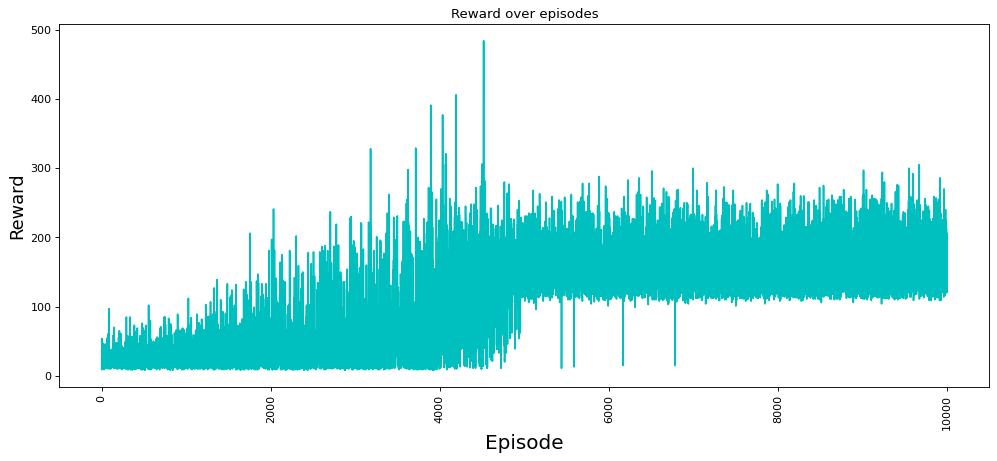

In [13]:
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=16)
plt.title('Reward over episodes')
plt.plot(range(len(rewards)), rewards, 'c-')

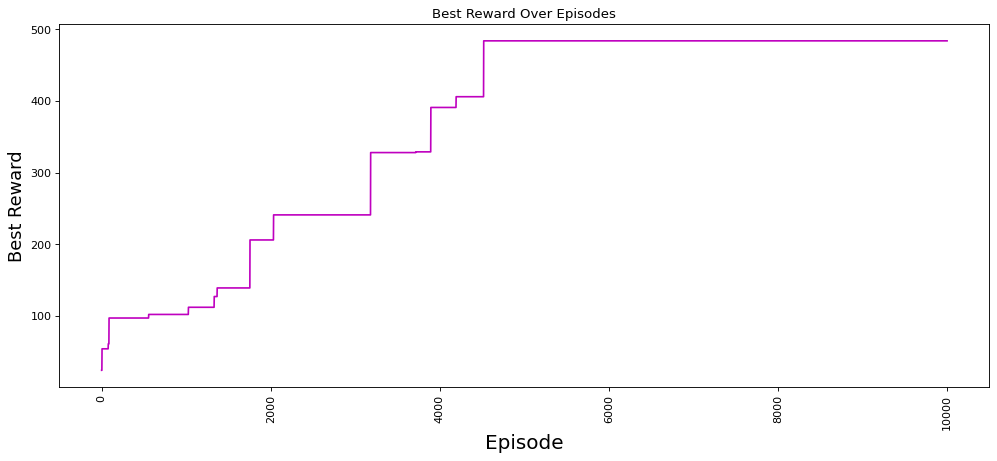

In [14]:
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=90)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Best Reward', fontsize=16)
plt.title('Best Reward Over Episodes')
plt.plot(range(len(best_rewards)), best_rewards, 'm-')

In [15]:
observation = env.reset()
observation = observation_coverter(observation)
episodic_reward = 0
done = False
    
while not done:
    env.render()
                                                        
    action = max_reward_state(observation)[0]
        
    next_observation, reward, done, info = env.step(action)
    episodic_reward += reward
        
    next_observation = observation_coverter(next_observation)
    observation = next_observation
    
env.close()

print("Reward: ", episodic_reward)

Reward:  130.0


In [ ]:
env.close()